<a href="https://colab.research.google.com/github/vipkas/AIoT-ElderyFallDetection/blob/main/1D_CNN_3_Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.12.0


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
#pd.read_csv('/content/drive/MyDrive/WISDM_ar_latest/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
directory = os.getcwd()+"/drive/MyDrive/coba/"
single_filename = "single_file_kfalldataset_3labels.csv"

#Complementary Filter with acc*acc_sen and with 3 label class
path = os.path.join(directory,single_filename)
df_chunk = pd.read_csv(path,chunksize=1000000)
df_list= []

for chunk in df_chunk:
  df_list.append(chunk)
  df = pd.concat(df_list,axis=0)

df

,Timestamp,Ax,Ay,Az,Gx,Gy,Gz,C1,C2,Roll,Pitch,Yaw,Condition
0,0.01,-0.250,-0.809,-0.188,-35.122325,14.954204,4.755551,0.312800,-0.351223,0.877754,-0.432819,0.149542,0
1,0.02,-0.070,-1.023,0.056,-2.578311,-0.171887,-0.114592,0.089644,-0.025783,-0.881074,-0.045101,359.998281,0
2,0.03,-0.070,-1.019,0.056,-3.781523,0.859437,-0.286479,0.089644,-0.037815,-0.882723,-0.057149,0.008594,0
3,0.04,-0.070,-1.019,0.044,-5.385805,1.948057,-0.458366,0.082680,-0.053858,-0.887782,-0.073123,0.019481,0
4,0.05,-0.069,-1.025,0.028,-6.531721,2.578311,-0.687550,0.074465,-0.065317,-0.894579,-0.084145,0.025783,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166758,10.64,-0.011,-0.115,1.010,0.000000,0.057296,0.000000,1.010060,0.000000,-0.480079,-0.003084,0.000573,0
166759,10.65,-0.011,-0.115,1.011,0.000000,0.057296,0.000000,1.011060,0.000000,-0.480047,-0.003081,0.000573,0
166760,10.66,-0.011,-0.115,1.013,0.000000,0.000000,0.000000,1.013060,0.000000,-0.479984,-0.003075,0.000000,0
166761,10.67,-0.011,-0.115,1.013,-0.057296,0.000000,0.000000,1.013060,-0.000573,-0.479984,-0.003646,0.000000,0


In [ ]:
columns = ['Timestamp', 'Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'Condition']

In [ ]:
data = pd.DataFrame(data = df, columns = columns)
data.head()

,Timestamp,Ax,Ay,Az,Gx,Gy,Gz,Condition
0,0.01,-0.250,-0.809,-0.188,-35.122325,14.954204,4.755551,0
1,0.02,-0.070,-1.023,0.056,-2.578311,-0.171887,-0.114592,0
2,0.03,-0.070,-1.019,0.056,-3.781523,0.859437,-0.286479,0
3,0.04,-0.070,-1.019,0.044,-5.385805,1.948057,-0.458366,0
4,0.05,-0.069,-1.025,0.028,-6.531721,2.578311,-0.687550,0


In [ ]:
data.shape

(166763, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166763 entries, 0 to 166762
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Timestamp  166763 non-null  float64
 1   Ax         166763 non-null  float64
 2   Ay         166763 non-null  float64
 3   Az         166763 non-null  float64
 4   Gx         166763 non-null  float64
 5   Gy         166763 non-null  float64
 6   Gz         166763 non-null  float64
 7   Condition  166763 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 10.2 MB


In [ ]:
data.isnull().sum()

Timestamp    0
Ax           0
Ay           0
Az           0
Gx           0
Gy           0
Gz           0
Condition    0
dtype: int64

In [ ]:
data['Condition'].value_counts()

0    82290
2    70126
1    14347
Name: Condition, dtype: int64

Balance This Data

In [ ]:
data['Ax'] = data['Ax'].astype('float')
data['Ay'] = data['Ay'].astype('float')
data['Az'] = data['Az'].astype('float')
data['Gx'] = data['Gx'].astype('float')
data['Gy'] = data['Gy'].astype('float')
data['Gz'] = data['Gz'].astype('float')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166763 entries, 0 to 166762
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Timestamp  166763 non-null  float64
 1   Ax         166763 non-null  float64
 2   Ay         166763 non-null  float64
 3   Az         166763 non-null  float64
 4   Gx         166763 non-null  float64
 5   Gy         166763 non-null  float64
 6   Gz         166763 non-null  float64
 7   Condition  166763 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 10.2 MB


In [ ]:
Fs = 100

In [ ]:
activities = data['Condition'].value_counts().index

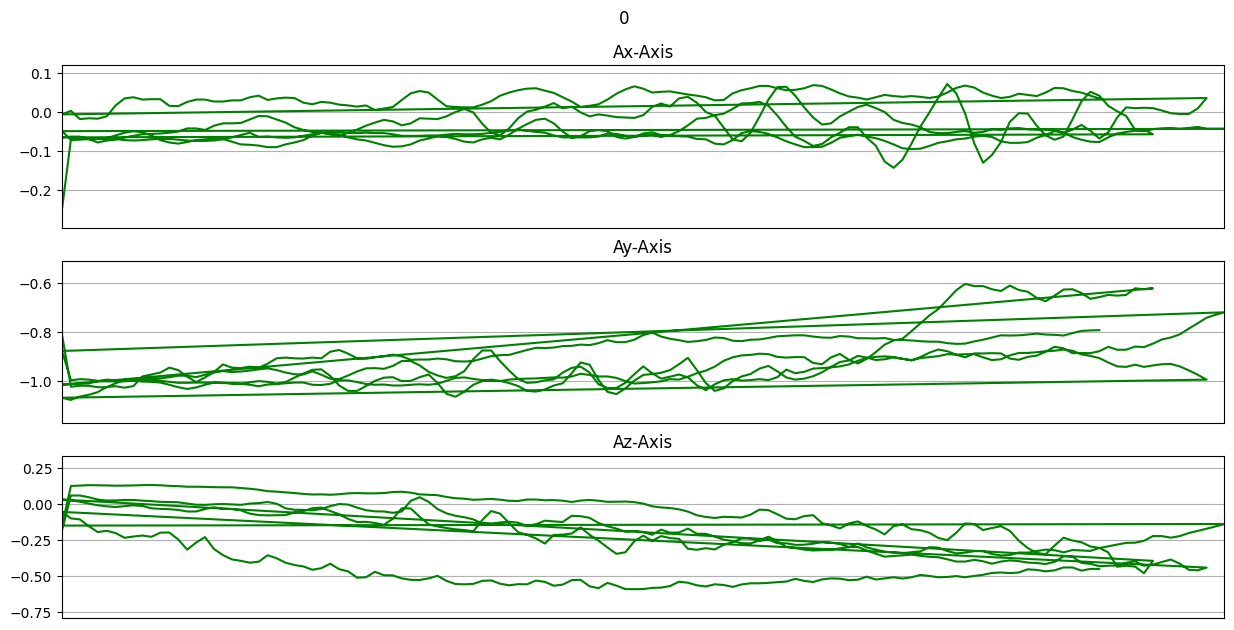

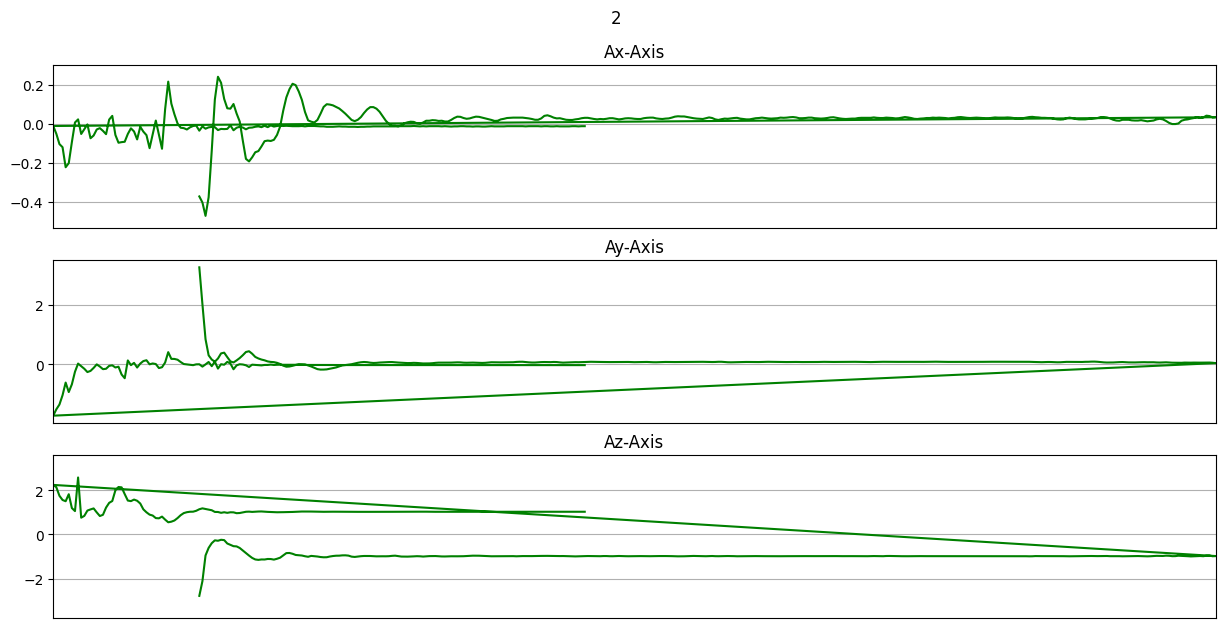

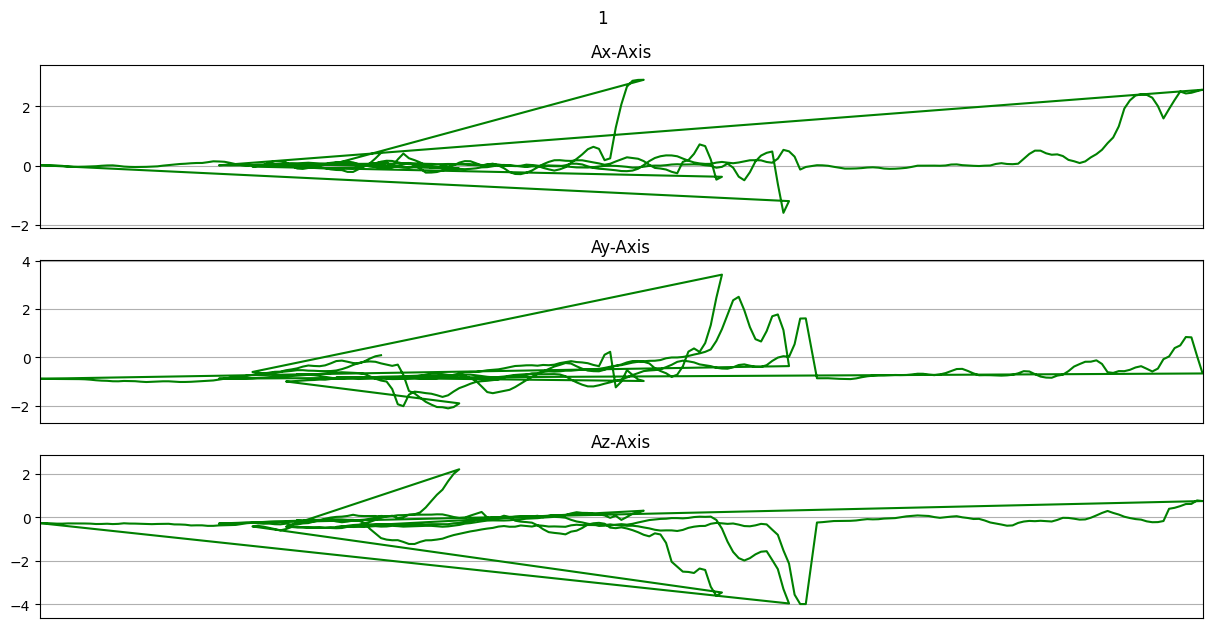

In [ ]:
def plot_activity(condition, data):
  # fig, (ax0, ax1, ax2, gx0, gx1, gx2) = plt.subplots(nrows=6, figsize=(15, 7), sharex=True)
  fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
  plot_axis(ax0, data['Timestamp'], data['Ax'], 'Ax-Axis')
  plot_axis(ax1, data['Timestamp'], data['Ay'], 'Ay-Axis')
  plot_axis(ax2, data['Timestamp'], data['Az'], 'Az-Axis')
  # plot_axis(gx0, data['Timestamp'], data['Gx'], 'Gx-Axis')
  # plot_axis(gx1, data['Timestamp'], data['Gy'], 'Gx-Axis')
  # plot_axis(gx2, data['Timestamp'], data['Gz'], 'Gx-Axis')
  plt.subplots_adjust(hspace=0.2)
  fig.suptitle(condition)
  plt.subplots_adjust(top=0.90)
  plt.show()

def plot_axis(ax, x, y, title):
  ax.plot(x, y, 'g')
  ax.set_title(title)
  ax.xaxis.set_visible(False)
  ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
  ax.set_xlim([min(x), max(x)])
  ax.grid(True)

for activity in activities:
  data_for_plot = data[(data['Condition'] == activity)][:Fs*5]
  plot_activity(activity, data_for_plot)
    

In [ ]:
df['Condition'].value_counts()

0    82290
2    70126
1    14347
Name: Condition, dtype: int64

In [ ]:
ADL = df[df['Condition'] == 0].head(14347).copy()
Fall = df[df['Condition'] == 1].copy()
FallImpact = df[df['Condition'] == 2].head(14347).copy()

In [ ]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([ADL, Fall, FallImpact])
balanced_data.shape

<ipython-input-150-6668e87ba592>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_data = balanced_data.append([ADL, Fall, FallImpact])


(43041, 13)

In [ ]:
balanced_data['Condition'].value_counts()

0    14347
1    14347
2    14347
Name: Condition, dtype: int64

In [ ]:
balanced_data.head()

,Timestamp,Ax,Ay,Az,Gx,Gy,Gz,C1,C2,Roll,Pitch,Yaw,Condition
0,0.01,-0.250,-0.809,-0.188,-35.122325,14.954204,4.755551,0.312800,-0.351223,0.877754,-0.432819,0.149542,0
1,0.02,-0.070,-1.023,0.056,-2.578311,-0.171887,-0.114592,0.089644,-0.025783,-0.881074,-0.045101,359.998281,0
2,0.03,-0.070,-1.019,0.056,-3.781523,0.859437,-0.286479,0.089644,-0.037815,-0.882723,-0.057149,0.008594,0
3,0.04,-0.070,-1.019,0.044,-5.385805,1.948057,-0.458366,0.082680,-0.053858,-0.887782,-0.073123,0.019481,0
4,0.05,-0.069,-1.025,0.028,-6.531721,2.578311,-0.687550,0.074465,-0.065317,-0.894579,-0.084145,0.025783,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['Condition'])
balanced_data.head()

,Timestamp,Ax,Ay,Az,Gx,Gy,Gz,C1,C2,Roll,Pitch,Yaw,Condition,label
0,0.01,-0.250,-0.809,-0.188,-35.122325,14.954204,4.755551,0.312800,-0.351223,0.877754,-0.432819,0.149542,0,0
1,0.02,-0.070,-1.023,0.056,-2.578311,-0.171887,-0.114592,0.089644,-0.025783,-0.881074,-0.045101,359.998281,0,0
2,0.03,-0.070,-1.019,0.056,-3.781523,0.859437,-0.286479,0.089644,-0.037815,-0.882723,-0.057149,0.008594,0,0
3,0.04,-0.070,-1.019,0.044,-5.385805,1.948057,-0.458366,0.082680,-0.053858,-0.887782,-0.073123,0.019481,0,0
4,0.05,-0.069,-1.025,0.028,-6.531721,2.578311,-0.687550,0.074465,-0.065317,-0.894579,-0.084145,0.025783,0,0


In [ ]:
label.classes_

array([0, 1, 2])

In [ ]:
X = balanced_data[['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']]
y = balanced_data['label']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz'])
scaled_X['label'] = y.values

scaled_X

,Ax,Ay,Az,Gx,Gy,Gz,label
0,-0.579541,-0.552600,-0.091675,-0.335211,0.215264,0.176989,0
1,-0.232233,-0.889737,0.241918,0.122363,-0.052420,0.042113,0
2,-0.232233,-0.883436,0.241918,0.105446,-0.034169,0.037353,0
3,-0.232233,-0.883436,0.225511,0.082889,-0.014904,0.032593,0
4,-0.230303,-0.892888,0.203636,0.066778,-0.003750,0.026246,0
...,...,...,...,...,...,...,...
43036,-0.211008,0.597449,1.550313,0.158615,-0.043294,0.043700,2
43037,-0.212938,0.599024,1.555781,0.158615,-0.041266,0.045287,2
43038,-0.211008,0.599024,1.555781,0.157809,-0.042280,0.043700,2
43039,-0.212938,0.595873,1.554414,0.157004,-0.042280,0.045287,2


In [ ]:
# FRAME PREPARATION

import scipy.stats as stats

frame_size = 24
hop_size = 24

In [ ]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 6

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        Ax = df['Ax'].values[i: i + frame_size]
        Ay = df['Ay'].values[i: i + frame_size]
        Az = df['Az'].values[i: i + frame_size]
        Gx = df['Gx'].values[i: i + frame_size]
        Gy = df['Gy'].values[i: i + frame_size]
        Gz = df['Gz'].values[i: i + frame_size]
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([Ax, Ay, Az, Gx, Gy, Gz])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

X, y = get_frames(scaled_X, frame_size, hop_size)

X.shape, y.shape

<ipython-input-159-367ab2ba1254>:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(df['label'][i: i + frame_size])[0][0]


((1793, 24, 6), (1793,))

In [ ]:
# (14347*6)/80

In [ ]:
# split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape, X_test.shape
# X_train.shape, X_test.shape, X_val.shape
# X_train_rest.shape, X_valid.shape

((1434, 24, 6), (359, 24, 6))

In [ ]:
X_train[0].shape, X_test[0].shape
# X_train[0].shape, X_test[0].shape, X_val[0].shape
# X_train_rest[0].shape, X_valid[0].shape

((24, 6), (24, 6))

In [ ]:
# reshape data to match model input
# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


X_train_reshaped = np.reshape(X_train, (1434, 144, 1))
X_test_reshaped = np.reshape(X_test, (359, 144, 1))

# X_train_reshaped = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
# X_test_reshaped = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))


### 1D CNN

In [ ]:
# remove the fourth dimension
# X_train = np.squeeze(X_train, axis=3)

In [ ]:
from tensorflow.keras.regularizers import l2

# Hapus model yang ada
tf.keras.backend.clear_session()

# create model
model = Sequential()

model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(144, 1), kernel_regularizer=l2(0.01)))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=256, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(units=128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(units=3, activation='softmax'))

In [ ]:
# menyesuaikan label pada data menjadi one-hot encoding dengan fungsi to_categorical

from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)


### COMPILE

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 142, 64)           256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 71, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 69, 128)           24704     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 34, 128)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 32, 256)           98560     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 16, 256)          0

### TRAINING MODEL

In [ ]:
# Train model

epochs = 100
batch_size = 128

history = model.fit(X_train_reshaped, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_reshaped, y_test))

# from tensorflow.keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(X_train_reshaped, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_reshaped, y_test), callbacks=[early_stopping])

Epoch 1/100
12/12 [==============================] - 4s 61ms/step - loss: 4.6975 - accuracy: 0.7985 - val_loss: 3.4667 - val_accuracy: 0.8691
Epoch 2/100
12/12 [==============================] - 0s 9ms/step - loss: 2.8210 - accuracy: 0.8849 - val_loss: 2.2430 - val_accuracy: 0.8997
Epoch 3/100
12/12 [==============================] - 0s 10ms/step - loss: 1.9196 - accuracy: 0.8884 - val_loss: 1.5564 - val_accuracy: 0.9053
Epoch 4/100
12/12 [==============================] - 0s 10ms/step - loss: 1.3846 - accuracy: 0.9045 - val_loss: 1.1925 - val_accuracy: 0.9025
Epoch 5/100
12/12 [==============================] - 0s 10ms/step - loss: 1.0922 - accuracy: 0.9031 - val_loss: 0.9348 - val_accuracy: 0.9053
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 0.8749 - accuracy: 0.9142 - val_loss: 0.8030 - val_accuracy: 0.9053
Epoch 7/100
12/12 [==============================] - 0s 9ms/step - loss: 0.7285 - accuracy: 0.9100 - val_loss: 0.6643 - val_accuracy: 0.9164
Epoch 8/1

In [ ]:
# model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# history = model.fit(X_train, y_train, epochs = 100, validation_data= (X_test, y_test), verbose=1)

In [ ]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

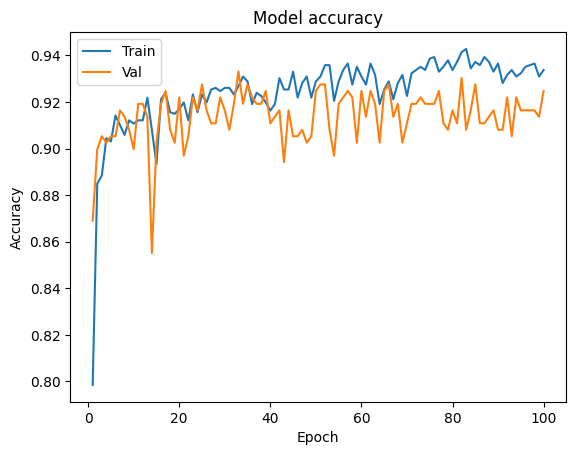

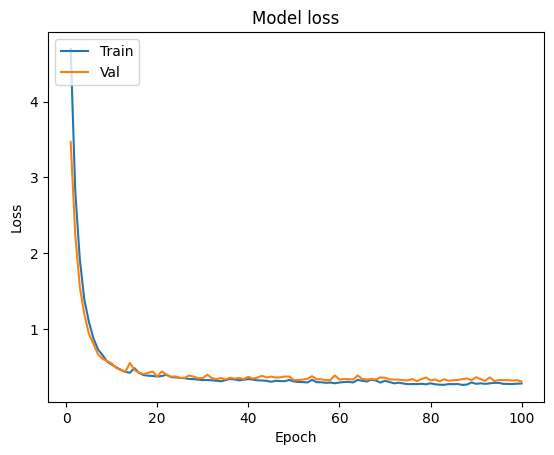

In [ ]:
plot_learningCurve(history, epochs)

### Convusion Matrix

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix, accuracy_score, recall_score, precision_score, classification_report

In [ ]:
y_pred = np.argmax(model.predict(X_test_reshaped), axis=-1)
# y_pred = model.predict(X_test_reshaped)
y_pred = to_categorical(y_pred, num_classes=3)

12/12 [==============================] - 0s 10ms/step


Confusion matrix class 0
[[228   5]
 [ 17 109]]


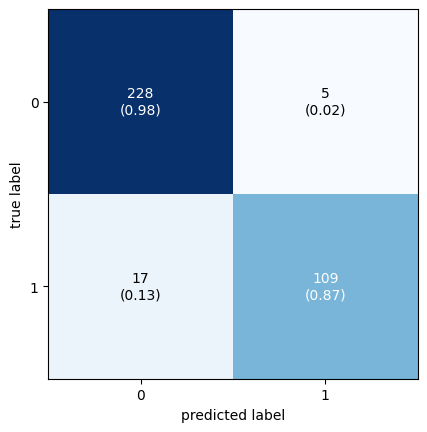

Confusion matrix class 1
[[249   9]
 [  7  94]]


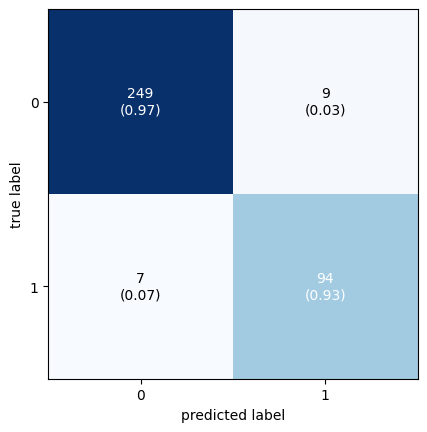

Confusion matrix class 2
[[215  12]
 [  2 130]]


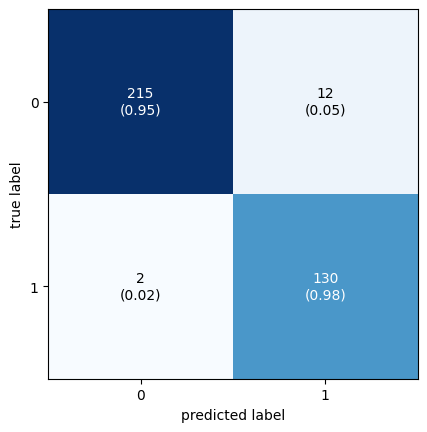

In [ ]:
# Hitung confusion matrix untuk data test
y_pred = np.where(y_pred > 0.5, 1, 0) # binarize output
cm = multilabel_confusion_matrix(y_test, y_pred)
# fig, ax = plt.subplots(figsize=(5, 5))
# Print confusion matrix
for i in range(cm.shape[0]):
    print(f"Confusion matrix class {i}")
    print(cm[i])
    plot_confusion_matrix(cm[i], show_normed=True)
    plt.show()

# Visualisasikan confusion matrix
# class_names = ['class 0', 'class 1', 'class 2']
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(cm[0], labels=label.classes_, ax=ax)
# plt.show()

In [ ]:
target = list(map(str, label.classes_))
# print(target)
print(classification_report(y_test, y_pred, target_names = target, digits=4))

# accuracy score
akurasi = accuracy_score(y_test, y_pred)
print("Akurasi: ",akurasi)


              precision    recall  f1-score   support

           0     0.9561    0.8651    0.9083       126
           1     0.9126    0.9307    0.9216       101
           2     0.9155    0.9848    0.9489       132

   micro avg     0.9276    0.9276    0.9276       359
   macro avg     0.9281    0.9269    0.9263       359
weighted avg     0.9290    0.9276    0.9270       359
 samples avg     0.9276    0.9276    0.9276       359

Akurasi:  0.9275766016713092


In [ ]:
# # model.save_weights('model.h5')
# # print(tf.data)

# # model.summary()

# # evaluate the model
# scores = model.evaluate(X_test_reshaped, y_pred, verbose=0)
# # print(model.metrics_names)
# print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))   

accuracy: 100.00%


In [ ]:
!pip install pyyaml h5py 

In [ ]:
# # save model and architecture to single file
# model.save("model.h5")

In [ ]:
# # serialize model to JSON
# model_json = model.to_json()
# with open('model.json', 'w') as json_file:
#     json_file.write(model_json)

# # serialize weights to HDF5
# model.save_weights('model.h5')

In [ ]:
# Calling `save('my_model')` creates a SavedModel folder `my_model`.
model.save("my_model")

# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("my_model")

In [ ]:
# Let's check:
np.testing.assert_allclose(
    model.predict(X_test), reconstructed_model.predict(X_test)
)

# The reconstructed model is already compiled and has retained the optimizer
# state, so training can resume:
reconstructed_model.fit(X_test, y_pred)

In [ ]:
!ls my_model

In [ ]:
# Calling `save('my_model.h5')` creates a h5 file `my_model.h5`.
model.save("my_h5_model.h5")

# It can be used to reconstruct the model identically.
reconstructed_model2 = keras.models.load_model("my_h5_model.h5")

In [ ]:
# Let's check:
np.testing.assert_allclose(
    model.predict(X_test), reconstructed_model2.predict(X_test)
)

# The reconstructed model is already compiled and has retained the optimizer
# state, so training can resume:
reconstructed_model2.fit(X_test, y_pred)

In [ ]:
!ls

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

### LSTM

In [ ]:
# # lstm model
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import Flatten
# from keras.layers import Dropout
# from keras.layers import LSTM
# from keras.utils import to_categorical
# from matplotlib import pyplot 

In [ ]:
# # fit and evaluate a model
# def evaluate_model(trainX, trainy, testX, testy):
#  verbose, epochs, batch_size = 0, 100, 64
#  n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
#  model = Sequential()
#  model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
#  model.add(Dropout(0.5))
#  model.add(Dense(100, activation='relu'))
#  model.add(Dense(n_outputs, activation='softmax'))
#  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#  # fit network
#  model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
#  # evaluate model
#  _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
#  return accuracy

In [ ]:
# # summarize scores
# def summarize_results(scores):
#  from numpy import mean, std
#  print(scores)
#  m, s = mean(scores), std(scores)
#  print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

In [ ]:
# # run an experiment

#  # zero-offset class values
# repeats = 10
# y_train = y_train - 1
# y_test = y_test - 1
# # one hot encode y
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)
# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
 
# # repeat experiment
# scores = list()
# for r in range(repeats):
#  score = evaluate_model(X_train, y_train, X_test, y_test)
#  score = score * 100.0
#  print('>#%d: %.3f' % (r+1, score))
#  scores.append(score)
 
# # summarize results
# summarize_results(scores)
 

### 2D CNN Model

In [ ]:
# NB_START_EPOCHS = 20  # Number of epochs usually start to train with
# BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent

# def deep_model(model, X_train, y_train, X_valid, y_valid):
#     '''
#     Function to train a multi-class model. The number of epochs and 
#     batch_size are set by the constants at the top of the
#     notebook. 
    
#     Parameters:
#         model : model with the chosen architecture
#         X_train : training features
#         y_train : training target
#         X_valid : validation features
#         Y_valid : validation target
#     Output:
#         model training history
#     '''
#     model.compile(optimizer='rmsprop'
#                   , loss='categorical_crossentropy'
#                   , metrics=['accuracy'])
    
#     history = model.fit(X_train
#                        , y_train
#                        , epochs=NB_START_EPOCHS
#                        , batch_size=BATCH_SIZE
#                        , validation_data=(X_valid, y_valid)
#                        , verbose=0)
#     return history
# def eval_metric(model, history, metric_name):
#     '''
#     Function to evaluate a trained model on a chosen metric. 
#     Training and validation metric are plotted in a
#     line chart for each epoch.
    
#     Parameters:
#         history : model training history
#         metric_name : loss or accuracy
#     Output:
#         line chart with epochs of x-axis and metric on
#         y-axis
#     '''
#     metric = history.history[metric_name]
#     val_metric = history.history['val_' + metric_name]
#     e = range(1, NB_START_EPOCHS + 1)
#     plt.plot(e, metric, 'bo', label='Train ' + metric_name)
#     plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
#     plt.xlabel('Epoch number')
#     plt.ylabel(metric_name)
#     plt.title('Comparing training and validation ' + metric_name + ' for ' + model.name)
#     plt.legend()
#     plt.show()
# def test_model(model, X_train, y_train, X_test, y_test, epoch_stop):
#     '''
#     Function to test the model on new data after training it
#     on the full training data with the optimal number of epochs.
    
#     Parameters:
#         model : trained model
#         X_train : training features
#         y_train : training target
#         X_test : test features
#         y_test : test target
#         epochs : optimal number of epochs
#     Output:
#         test accuracy and test loss
#     '''
#     model.fit(X_train
#               , y_train
#               , epochs=epoch_stop
#               , batch_size=BATCH_SIZE
#               , verbose=0)
#     results = model.evaluate(X_test, y_test)
#     print()
#     print('Test accuracy: {0:.2f}%'.format(results[1]*100))
#     return results
    
# def compare_models_by_metric(model_1, model_2, model_hist_1, model_hist_2, metric):
#     '''
#     Function to compare a metric between two models 
    
#     Parameters:
#         model_hist_1 : training history of model 1
#         model_hist_2 : training history of model 2
#         metrix : metric to compare, loss, acc, val_loss or val_acc
        
#     Output:
#         plot of metrics of both models
#     '''
#     metric_model_1 = model_hist_1.history[metric]
#     metric_model_2 = model_hist_2.history[metric]
#     e = range(1, NB_START_EPOCHS + 1)
    
#     metrics_dict = {
#         'acc' : 'Training Accuracy',
#         'loss' : 'Training Loss',
#         'val_acc' : 'Validation accuracy',
#         'val_loss' : 'Validation loss'
#     }
    
#     metric_label = metrics_dict[metric]
#     plt.plot(e, metric_model_1, 'bo', label=model_1.name)
#     plt.plot(e, metric_model_2, 'b', label=model_2.name)
#     plt.xlabel('Epoch number')
#     plt.ylabel(metric_label)
#     plt.title('Comparing ' + metric_label + ' between models')
#     plt.legend()
#     plt.show()
    
# def optimal_epoch(model_hist):
#     '''
#     Function to return the epoch number where the validation loss is
#     at its minimum
    
#     Parameters:
#         model_hist : training history of model
#     Output:
#         epoch number with minimum validation loss
#     '''
#     min_epoch = np.argmin(model_hist.history['val_loss']) + 1
#     print("Minimum validation loss reached in epoch {}".format(min_epoch))
#     return min_epoch

In [ ]:
from keras import models
from keras import layers
from keras import regularizers

model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

# #Reduce the network's capacity by removing one hidden layer and lowering number of elements
# reduced_model = models.Sequential()
# reduced_model.add(layers.Dense(16, activation='relu', input_shape=X_train[0].shape))
# reduced_model.add(layers.Dense(3, activation='softmax'))

# reduced_model._name = 'Reduced_model'
# reduced_history = deep_model(reduced_model, X_train_rest, y_train_rest, X_valid, y_valid)
# reduced_min = optimal_epoch(reduced_history)

# eval_metric(reduced_model, reduced_history, 'loss')

In [ ]:
# model2 = Sequential()

# model2.add(Dense(64, input_dim=64, kernel_regularizer=regularizers.l2(0.01)))

# # Hidden Layer 1
# model2.add(layers.Conv2D(64, (4, 4), activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
# model2.add(layers.MaxPool2D((2, 2)))

# # Hidden Layer 2
# model2.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
# model2.add(layers.MaxPool2D((2,2)))